# Use matching to assess whether remote workers have higher career satisfaction
# H0: There is no difference between the 2 groups



1.   Pick the variables
2.   Must be enough to describe the people and describe the people
3.   T-test and Chi2 loops
4.   Transform the character variables into binary
5.   Perform Matching
6.   Perform Robustness check





In [44]:
!pip install causalinference

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from causalinference import CausalModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss

In [46]:
%cd /content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching


In [47]:
df = pd.read_csv('stackoverflow.csv')

In [48]:
df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# Drop unecessary variable - every thing after careersatisfcation
df = df.iloc[:,:8]

In [50]:
#Transform character variables into dummies

df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Country_Germany,Country_India,Country_United Kingdom,Country_United States,Remote_Remote
0,100000.000000,20,0,1,5000,8,0,0,1,0,1
1,130000.000000,20,1,1,1000,9,0,0,0,1,1
2,175000.000000,16,0,1,10000,7,0,0,0,1,0
3,64516.129030,4,0,0,1000,9,1,0,0,0,0
4,6636.323594,1,0,1,5000,5,0,1,0,0,0


In [51]:
# Check if there is a differenct between working remotley or not

df.groupby('Remote_Remote')['CareerSatisfaction'].mean()



Remote_Remote
0    7.551106
1    7.855652
Name: CareerSatisfaction, dtype: float64

In [52]:
#continuous variables T-Test

continuous = ['Salary', 'YearsCodedJob']

stat = {}
pval = {}

for i in continuous:
  group_1 = df.where(df.Remote_Remote == 0).dropna()[i]
  group_2 = df.where(df.Remote_Remote == 1).dropna()[i]
  stat[i], pval[i] = ss.ttest_ind(group_1, group_2)

  # Store in df

df_ttest = pd.DataFrame.from_dict(pval, orient='index')
df_ttest.columns = ['pval']
print(df_ttest)




                       pval
Salary         1.057708e-22
YearsCodedJob  3.637316e-30


In [53]:
#Pvalues are small, contribute significantly so groups are not comparable

In [ ]:
# Hobby is insignificant, it doesnt play a role

In [ ]:
#

#Matching

In [57]:
# Isolate y , treat , confounders

treat = df['Remote_Remote'].values
y = df['CareerSatisfaction'].values
confounders = df.drop(['CareerSatisfaction', 'Remote_Remote'], axis=1).values

<Axes: >

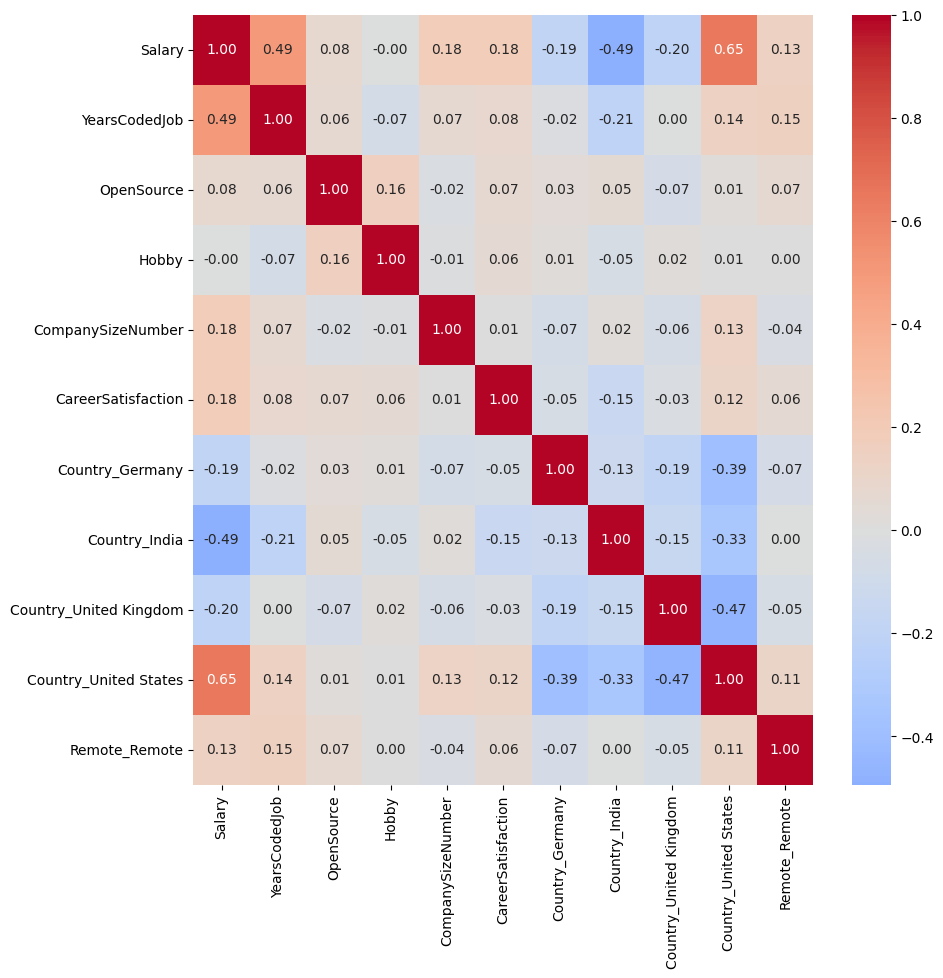

In [58]:
# Check for collinearity and other problems, I had a typo first time
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', center = 0, fmt='.2f')

In [61]:
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj= True)

/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [62]:
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.114      0.130      0.881      0.378     -0.140      0.368
           ATC      0.106      0.136      0.778      0.436     -0.161      0.372
           ATT      0.187      0.142      1.321      0.187     -0.090      0.464



In [63]:
# The ATE is positive implying remote workers are happier but the pvalue says not to a statiscally relevant amount~

In [64]:
#Robustness check - Remove 1 confounders - Hobby was the most similar in both groups

confounders = df.drop(['CareerSatisfaction', 'Remote_Remote', 'Hobby'], axis=1).values

In [65]:
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj= True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.148      0.131      1.128      0.259     -0.109      0.406
           ATC      0.140      0.138      1.013      0.311     -0.131      0.411
           ATT      0.220      0.137      1.602      0.109     -0.049      0.488



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [ ]:
# Still doesnt show statisticall significance - either we need more variables or remote workers generally dont have a higher career satisfaction